In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys, os
sys.path.append(os.path.abspath(".."))

from utils.metrics import compute_accuracy


In [2]:
gt = np.load("../data/sequences/ground_truth_labels.npy", allow_pickle=True)
pred = np.load("../data/sequences/viterbi_predictions.npy", allow_pickle=True)

In [3]:
flat_gt = [s for seq in gt for s in seq]
flat_pred = [s for seq in pred for s in seq]

accuracy = compute_accuracy(flat_gt, flat_pred)
print(f"Viterbi Overall Accuracy: {accuracy:.4f}")

Viterbi Overall Accuracy: 0.7285


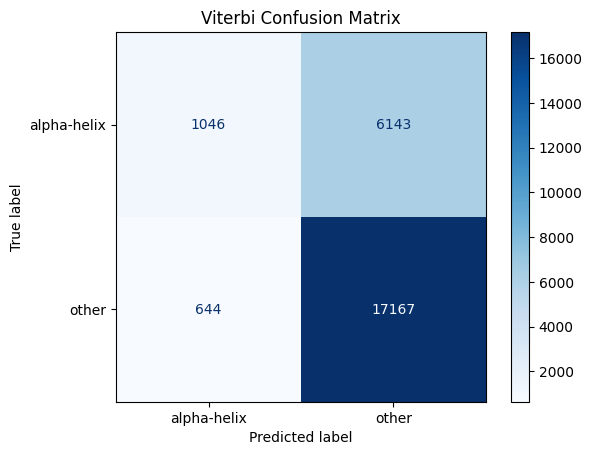

In [4]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

label_map = {'alpha-helix': 0, 'other': 1}
gt_int = [label_map[s] for s in flat_gt]
pred_int = [label_map[s] for s in flat_pred]

cm = confusion_matrix(gt_int, pred_int)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["alpha-helix", "other"])
disp.plot(cmap='Blues')
plt.title("Viterbi Confusion Matrix")
plt.show()


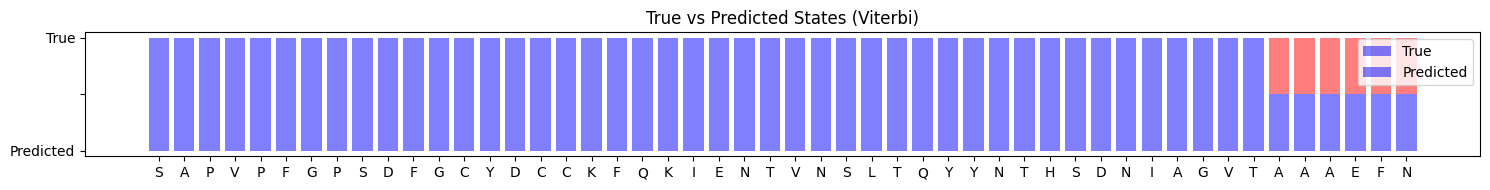

In [5]:
index = 0
sequence = np.load("../data/sequences/simulated_sequences.npy", allow_pickle=True)[index]
true_states = gt[index]
pred_states = pred[index]

colors = {'alpha-helix': 'red', 'other': 'blue'}

plt.figure(figsize=(15, 2))
plt.bar(range(len(sequence)), [1]*len(sequence), color=[colors[s] for s in true_states], alpha=0.5, label='True')
plt.bar(range(len(sequence)), [-1]*len(sequence), color=[colors[s] for s in pred_states], alpha=0.5, label='Predicted')
plt.xticks(range(len(sequence)), sequence)
plt.title("True vs Predicted States (Viterbi)")
plt.yticks([-1, 0, 1], ["Predicted", "", "True"])
plt.legend()
plt.tight_layout()
plt.show()
